In [18]:
# 필요한 패키지 설치 및 로드
install.packages("ggplot2")
install.packages("maps")
install.packages("showtext")
install.packages("mapproj")
library(ggplot2)
library(maps)
library(showtext)

font_add_google("Nanum Gothic", "nanumgothic")
showtext_auto()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sysfonts’, ‘showtextdb’


Loading required package: sysfonts

Loading required package: showtextdb



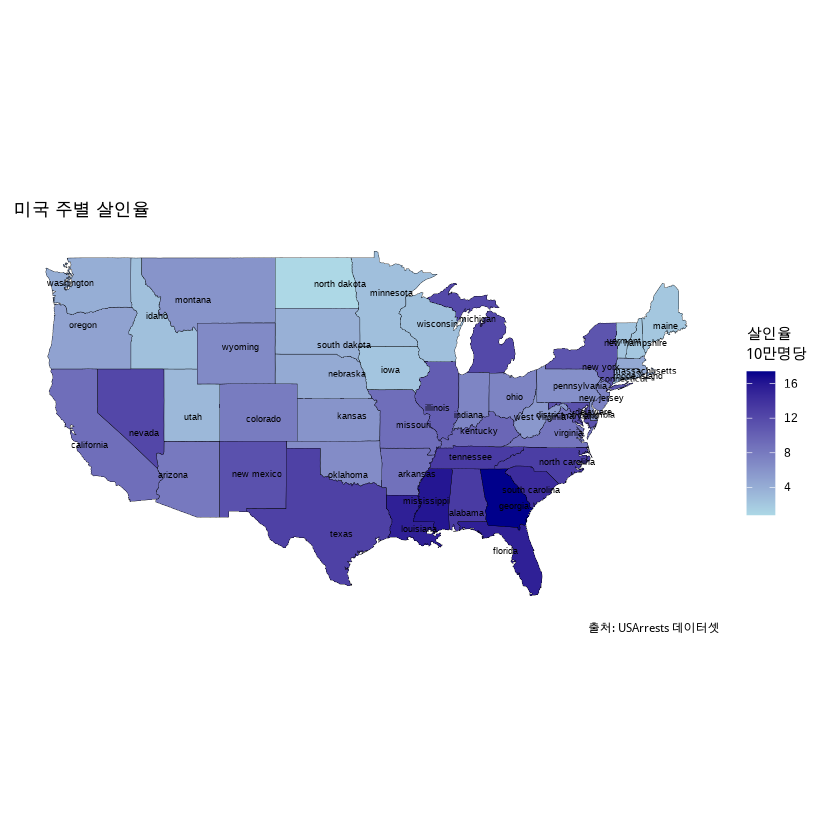

In [25]:
# USArrests 데이터셋
data("USArrests")

# 데이터셋의 행 이름(주 이름)을 소문자로 변환하여 state 열로 추가
USArrests$state <- tolower(rownames(USArrests))

# 미국 주 경계 데이터
states_map <- map_data("state")

# 지도 데이터와 범죄 데이터 병합
map_data <- merge(states_map, USArrests, by.x = "region", by.y = "state")

# 그룹과 순서로 정렬
map_data <- map_data[order(map_data$group, map_data$order), ]

# 주 이름 표시를 위한 중심점 계산
state_centers <- aggregate(cbind(long, lat) ~ region, data = states_map, FUN = mean)

# 살인율을 표시한 미국 지도 생성
ggplot() +
  # 주 경계
  geom_polygon(data = map_data,
               aes(x = long, y = lat, group = group, fill = Murder),
               color = "black", linewidth = 0.1) +
  # 주 이름 표시
  geom_text(data = state_centers,
            aes(x = long, y = lat, label = region),
            size = 2.5, inherit.aes = FALSE) +
  # 색상 그라데이션 설정
  scale_fill_gradient(low = "lightblue", high = "darkblue",
                     name = "살인율\n10만명당", n.breaks = 6) +
  coord_map() +
  labs(title = "미국 주별 살인율",
       caption = "출처: USArrests 데이터셋") +
  theme_minimal() +
  theme(axis.title = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank(),
        panel.grid = element_blank())

In [27]:
library(ggplot2)
library(maps)

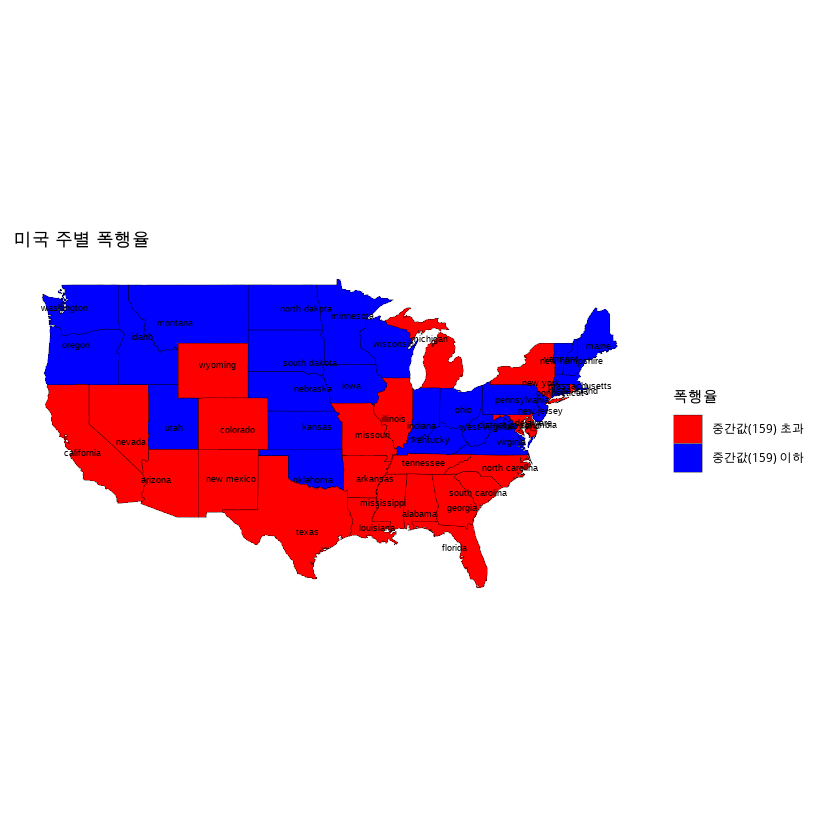

In [30]:
# 폭행율(Assault)의 중간값 계산
assault_median <- median(USArrests$Assault)

# 중간값을 초과하는지 여부에 따라 그룹 변수 추가
USArrests$assault_group <- ifelse(USArrests$Assault > assault_median, "high", "low")

# 지도 데이터와 범죄 데이터 병합 (이전 코드 재사용)
map_data <- merge(states_map, USArrests, by.x = "region", by.y = "state")

# 그룹과 순서로 정렬 (이전 코드 재사용)
map_data <- map_data[order(map_data$group, map_data$order), ]

# 폭행율 중간값 기준 미국 지도 생성
ggplot() +
  # 주 경계
  geom_polygon(data = map_data,
               aes(x = long, y = lat, group = group, fill = assault_group),
               color = "black", linewidth = 0.1) +
  # 주 이름 표시
  geom_text(data = state_centers,
            aes(x = long, y = lat, label = region),
            size = 2.5, inherit.aes = FALSE) +
  # 색상 설정
  scale_fill_manual(name = "폭행율",
                   values = c("high" = "red", "low" = "blue"),
                   labels = c("high" = paste0("중간값(", assault_median, ") 초과"),
                             "low" = paste0("중간값(", assault_median, ") 이하"))) +
  coord_map() +
  labs(title = "미국 주별 폭행율") +
  theme_minimal() +
  theme(axis.title = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank(),
        panel.grid = element_blank())


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




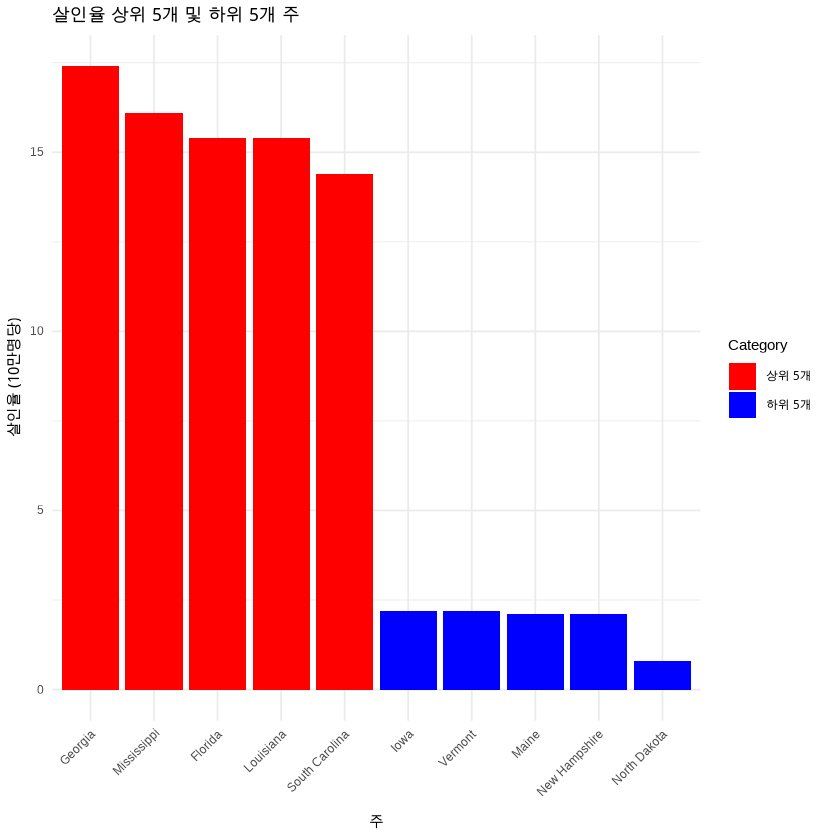

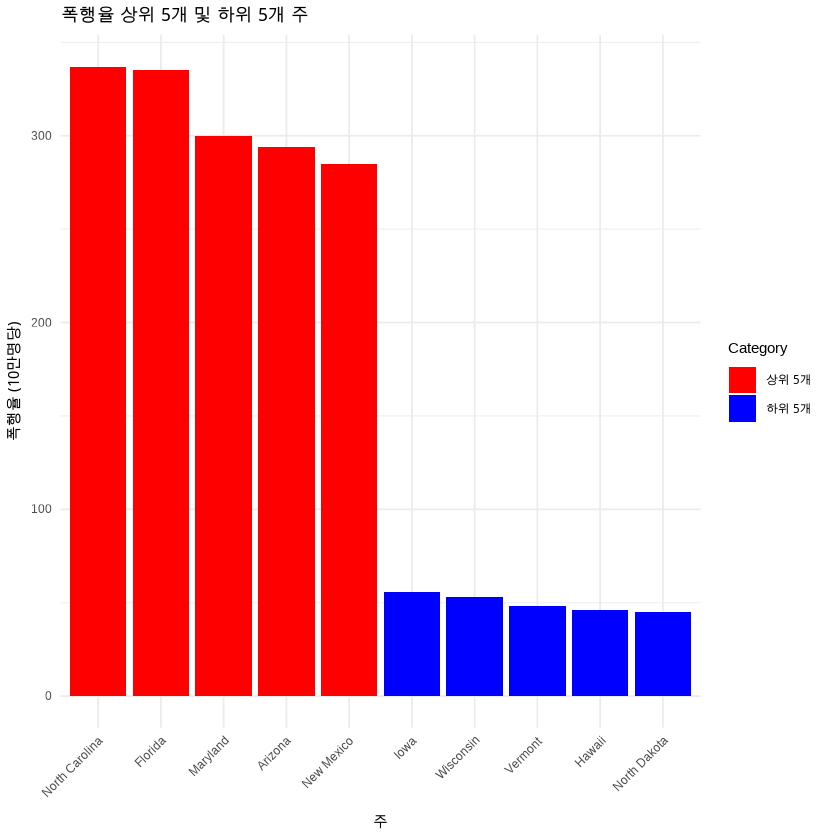

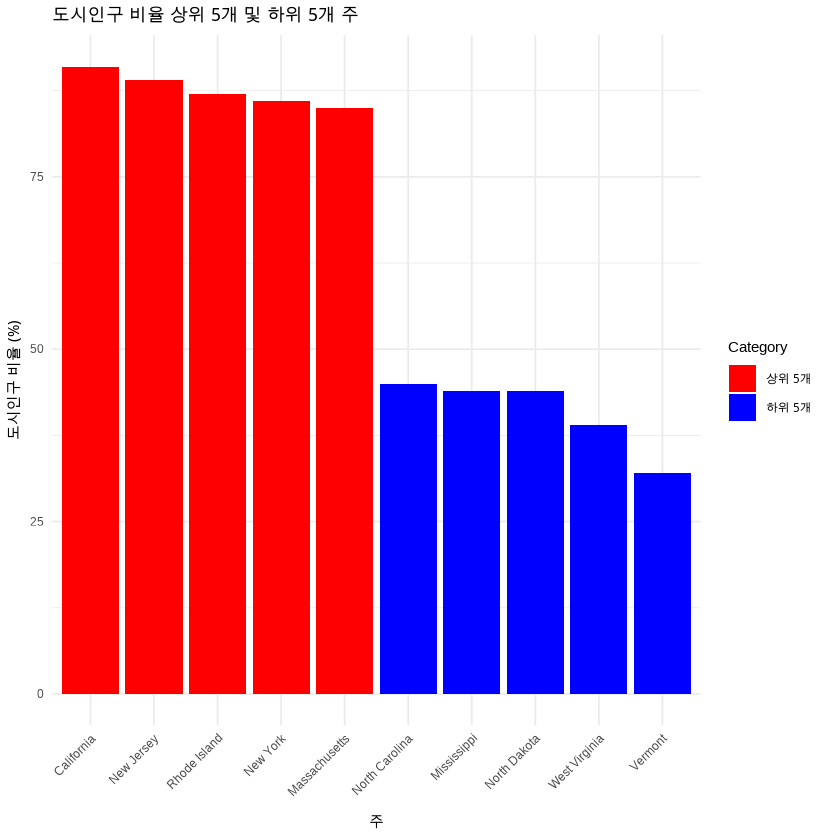

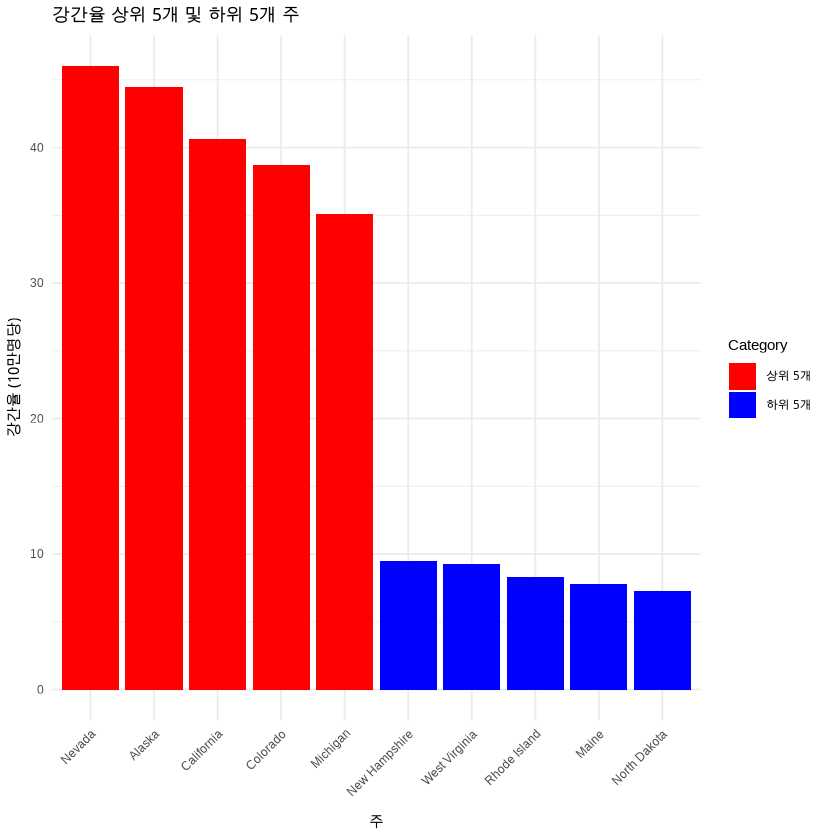

In [31]:
# 필요한 패키지 로드
library(ggplot2)
library(dplyr)

# USArrests 데이터셋 로드
data("USArrests")

# 데이터프레임에 주 이름을 열로 추가
USArrests$State <- rownames(USArrests)

# 1. 각 변수별로 상위 5개, 하위 5개 주 추출

# 살인(Murder) 상위 5개, 하위 5개 주
murder_high <- USArrests %>%
  arrange(desc(Murder)) %>%
  head(5)

murder_low <- USArrests %>%
  arrange(Murder) %>%
  head(5)

murder_data <- rbind(murder_high, murder_low)
murder_data$Category <- c(rep("상위 5개", 5), rep("하위 5개", 5))
murder_data$State <- factor(murder_data$State, levels = murder_data$State[order(murder_data$Murder, decreasing = TRUE)])

# 폭행(Assault) 상위 5개, 하위 5개 주
assault_high <- USArrests %>%
  arrange(desc(Assault)) %>%
  head(5)

assault_low <- USArrests %>%
  arrange(Assault) %>%
  head(5)

assault_data <- rbind(assault_high, assault_low)
assault_data$Category <- c(rep("상위 5개", 5), rep("하위 5개", 5))
assault_data$State <- factor(assault_data$State, levels = assault_data$State[order(assault_data$Assault, decreasing = TRUE)])

# 도시인구(UrbanPop) 상위 5개, 하위 5개 주
urbanpop_high <- USArrests %>%
  arrange(desc(UrbanPop)) %>%
  head(5)

urbanpop_low <- USArrests %>%
  arrange(UrbanPop) %>%
  head(5)

urbanpop_data <- rbind(urbanpop_high, urbanpop_low)
urbanpop_data$Category <- c(rep("상위 5개", 5), rep("하위 5개", 5))
urbanpop_data$State <- factor(urbanpop_data$State, levels = urbanpop_data$State[order(urbanpop_data$UrbanPop, decreasing = TRUE)])

# 강간(Rape) 상위 5개, 하위 5개 주
rape_high <- USArrests %>%
  arrange(desc(Rape)) %>%
  head(5)

rape_low <- USArrests %>%
  arrange(Rape) %>%
  head(5)

rape_data <- rbind(rape_high, rape_low)
rape_data$Category <- c(rep("상위 5개", 5), rep("하위 5개", 5))
rape_data$State <- factor(rape_data$State, levels = rape_data$State[order(rape_data$Rape, decreasing = TRUE)])

# 2. 각 변수별 막대 그래프 생성

# 살인(Murder) 막대 그래프
murder_plot <- ggplot(murder_data, aes(x = State, y = Murder, fill = Category)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("상위 5개" = "red", "하위 5개" = "blue")) +
  labs(title = "살인율 상위 5개 및 하위 5개 주",
       x = "주",
       y = "살인율 (10만명당)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# 폭행(Assault) 막대 그래프
assault_plot <- ggplot(assault_data, aes(x = State, y = Assault, fill = Category)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("상위 5개" = "red", "하위 5개" = "blue")) +
  labs(title = "폭행율 상위 5개 및 하위 5개 주",
       x = "주",
       y = "폭행율 (10만명당)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# 도시인구(UrbanPop) 막대 그래프
urbanpop_plot <- ggplot(urbanpop_data, aes(x = State, y = UrbanPop, fill = Category)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("상위 5개" = "red", "하위 5개" = "blue")) +
  labs(title = "도시인구 비율 상위 5개 및 하위 5개 주",
       x = "주",
       y = "도시인구 비율 (%)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# 강간(Rape) 막대 그래프
rape_plot <- ggplot(rape_data, aes(x = State, y = Rape, fill = Category)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("상위 5개" = "red", "하위 5개" = "blue")) +
  labs(title = "강간율 상위 5개 및 하위 5개 주",
       x = "주",
       y = "강간율 (10만명당)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# 3. 그래프 출력
print(murder_plot)
print(assault_plot)
print(urbanpop_plot)
print(rape_plot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,youtube,facebook,newspaper,sales
,<dbl>,<dbl>,<dbl>,<dbl>
1,276.12,45.36,83.04,26.52
2,53.40,47.16,54.12,12.48
3,20.64,55.08,83.16,11.16
4,181.80,49.56,70.20,22.20
5,216.96,12.96,70.08,15.48
6,10.44,58.68,90.00,8.64


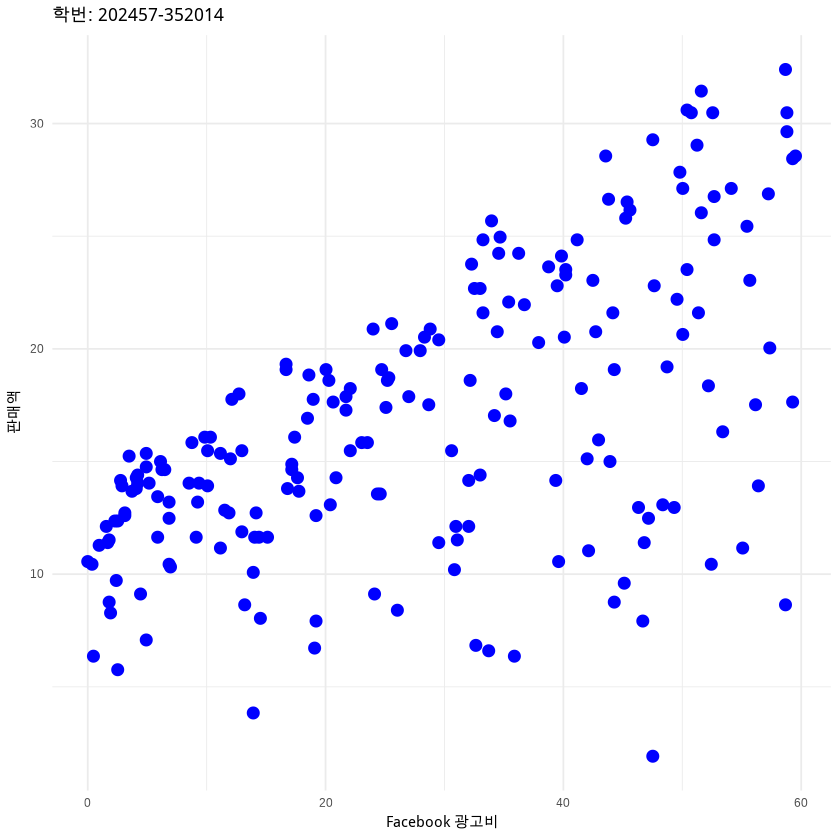

In [35]:
# 필요한 패키지 설치 및 로드
install.packages("datarium")
library(datarium)
library(ggplot2)

# marketing 데이터셋 불러오기
dat <- marketing

# 데이터 확인
head(dat)

# 1) facebook을 x축, sales를 y축으로 하는 산점도 그리기
plot1 <- ggplot(dat, aes(x = facebook, y = sales)) +
  geom_point(color = "blue", size = 3) +
  labs(x = "Facebook 광고비", y = "판매액",
       title = "학번: 202457-352014") +
  theme_minimal()

# 산점도 출력
print(plot1)

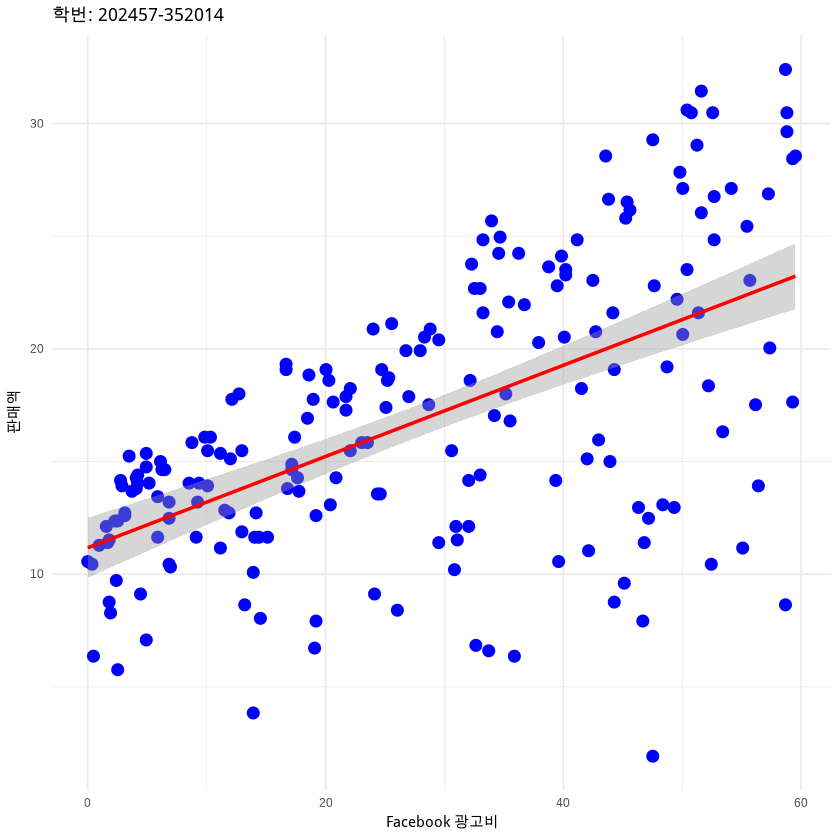

In [38]:

# 2) facebook을 독립변수(설명변수), sales를 종속변수(반응변수, 결과변수)로 하는 회귀직선을 산점도 위에 그리고 산점도의 제목으로 본인의 학번을 출력하시오
# 회귀모델 생성
model <- lm(sales ~ facebook, data = dat)

# 회귀직선이 추가된 산점도 생성
plot2 <- ggplot(dat, aes(x = facebook, y = sales)) +
  geom_point(color = "blue", size = 3) +
  geom_smooth(method = "lm", formula = y ~ x, color = "red", se = TRUE) +
  labs(x = "Facebook 광고비", y = "판매액",
       title = "학번: 202457-352014") +
  theme_minimal()

# 최종 산점도 출력
print(plot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zoo’, ‘colorspace’, ‘lmtest’


Loading required package: grid



,ID,Treatment,Sex,Age,Improved
,<int>,<fct>,<fct>,<int>,<ord>
1,57,Treated,Male,27,Some
2,46,Treated,Male,29,None
3,77,Treated,Male,30,None
4,17,Treated,Male,32,Marked
5,36,Treated,Male,46,Marked
6,23,Treated,Male,58,Marked


'data.frame':	84 obs. of  5 variables:
 $ ID       : int  57 46 77 17 36 23 75 39 33 55 ...
 $ Treatment: Factor w/ 2 levels "Placebo","Treated": 2 2 2 2 2 2 2 2 2 2 ...
 $ Sex      : Factor w/ 2 levels "Female","Male": 2 2 2 2 2 2 2 2 2 2 ...
 $ Age      : int  27 29 30 32 46 58 59 59 63 63 ...
 $ Improved : Ord.factor w/ 3 levels "None"<"Some"<..: 2 1 1 3 3 3 1 3 1 1 ...


         
          None Some Marked
  Placebo   29    7      7
  Treated   13    7     21

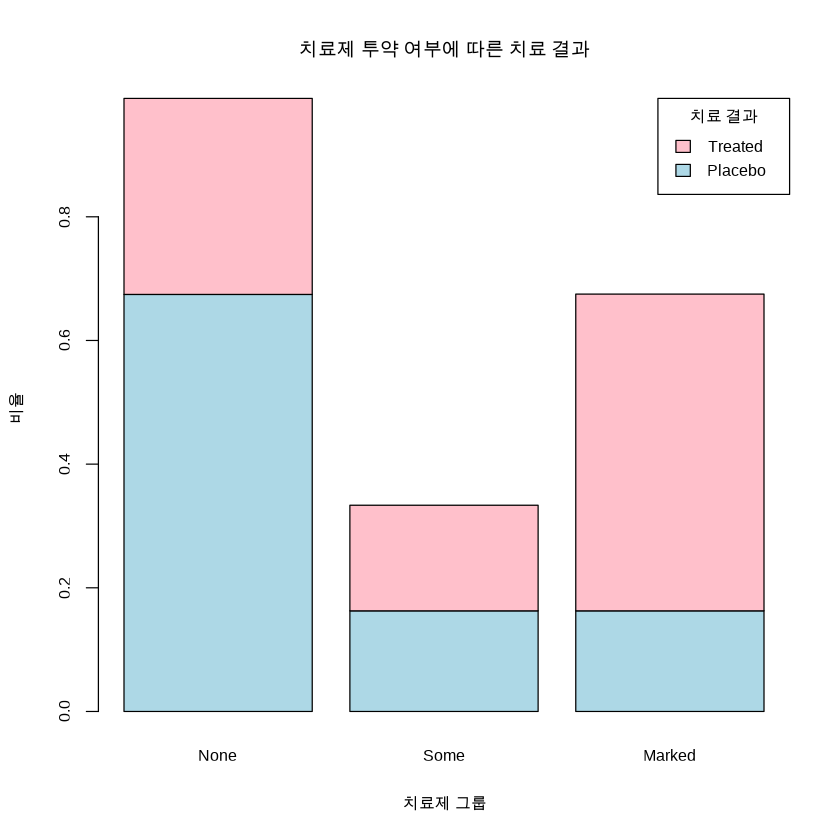

        
         None Some Marked
  Female   25   12     22
  Male     17    2      6

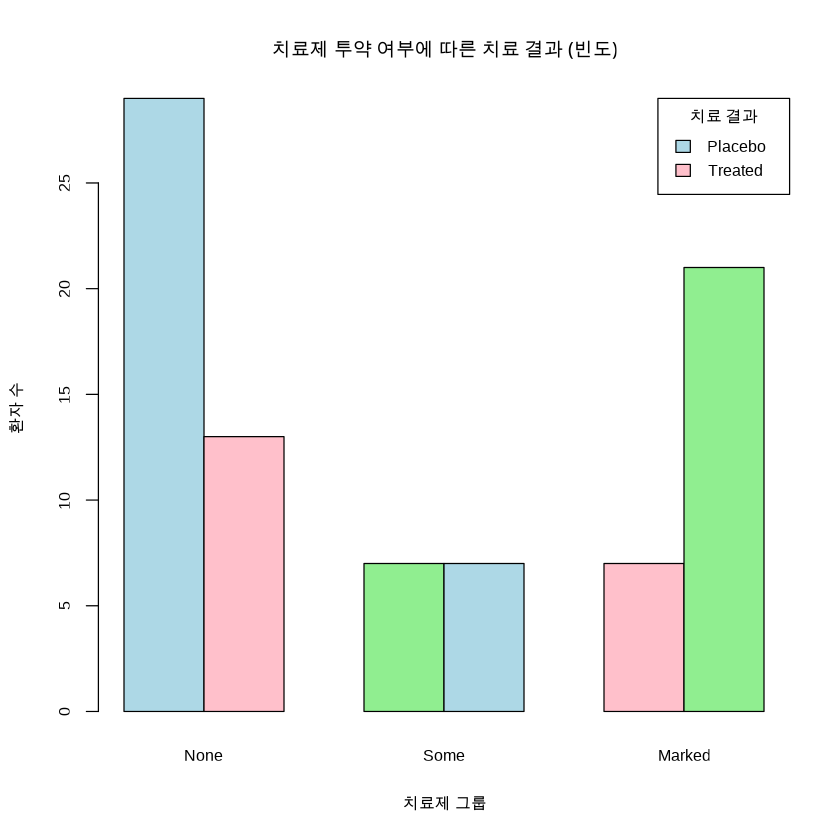

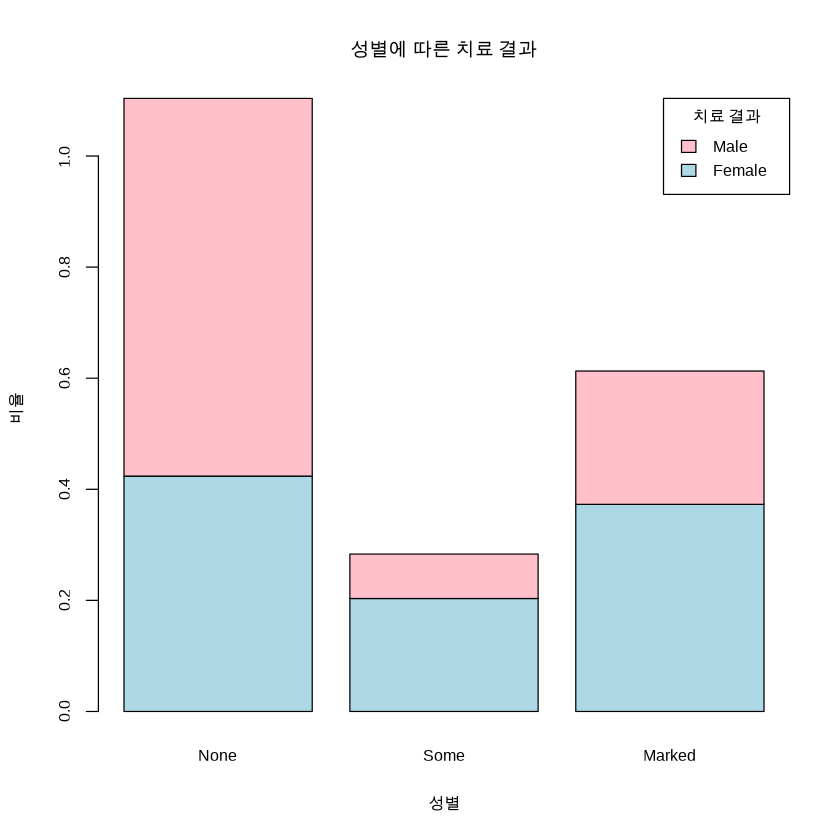

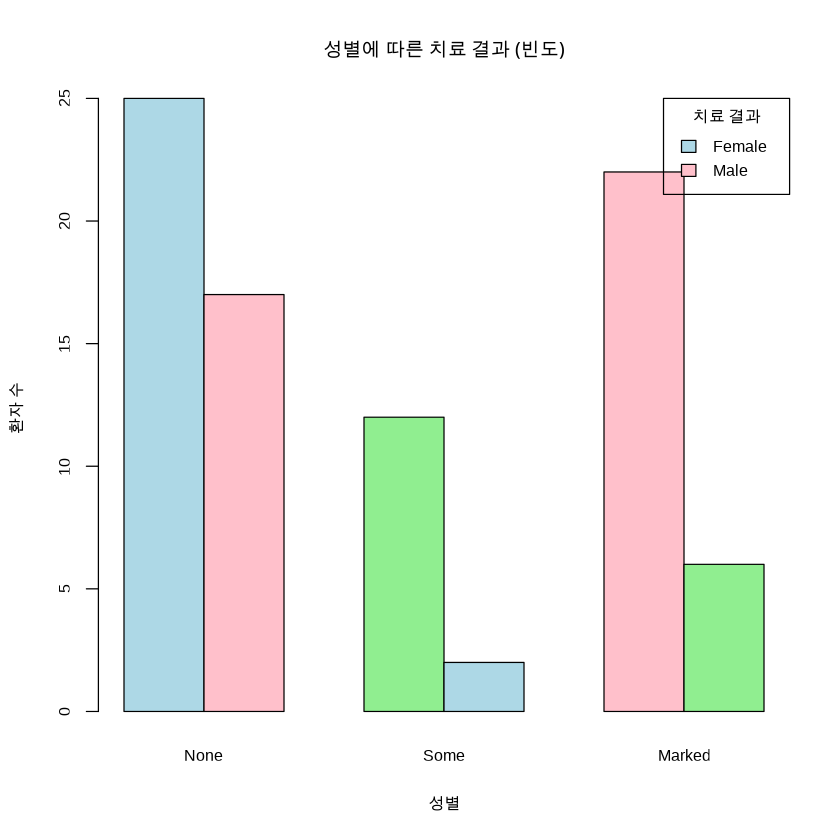

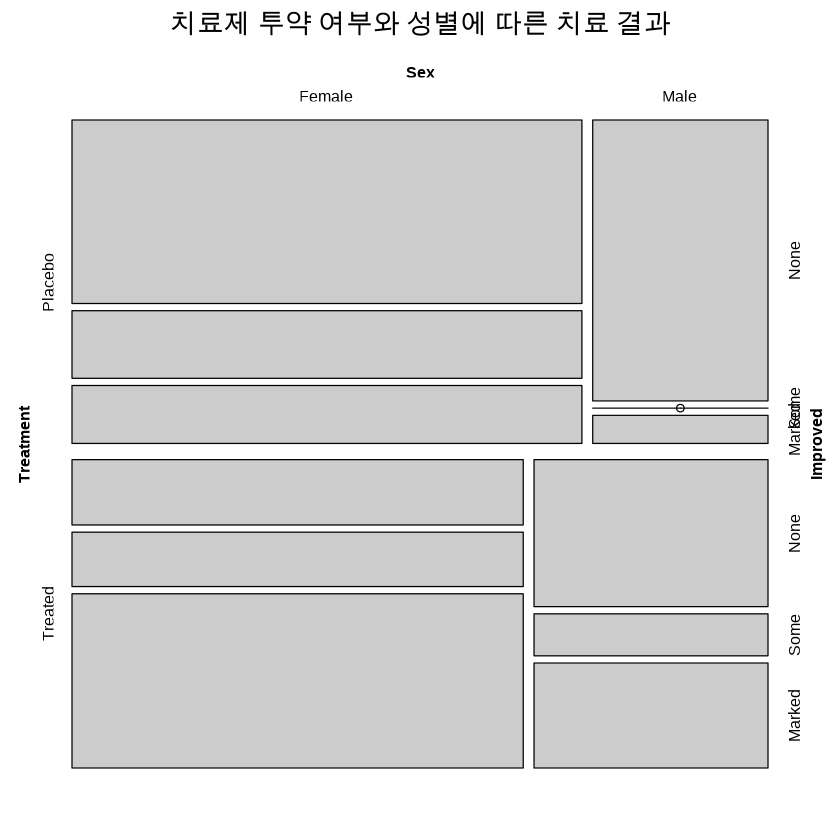

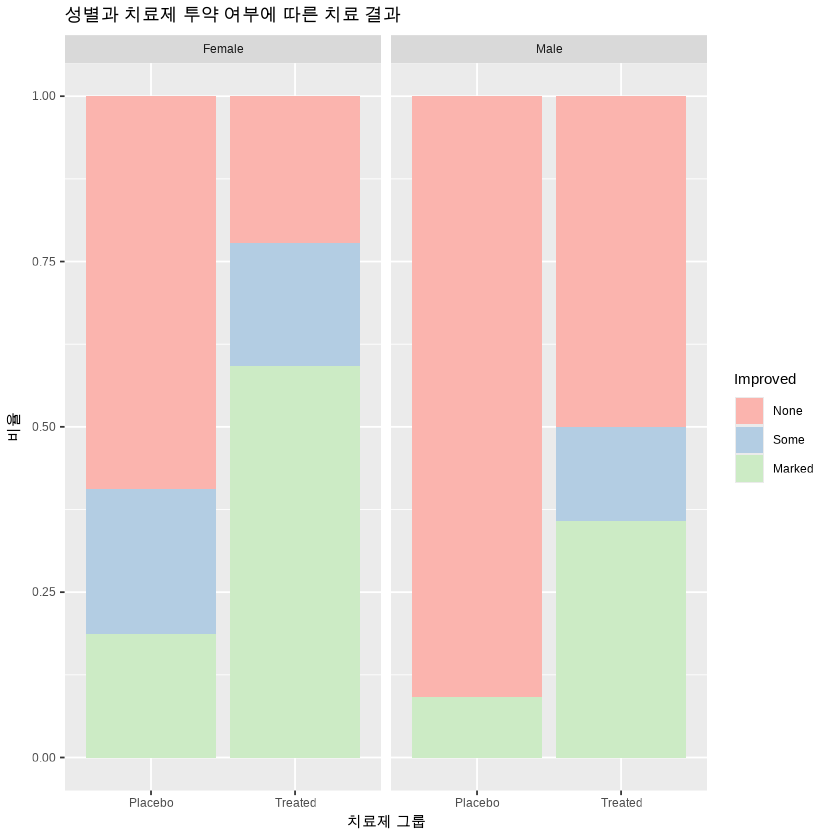

In [39]:
# 필요한 패키지 설치 및 로드
install.packages("vcd")
library(vcd)
library(ggplot2)

# Arthritis 데이터셋 불러오기
data(Arthritis)

# 데이터 확인
head(Arthritis)
str(Arthritis)

# 1. 치료제 투약 여부(Treatment)와 치료 결과(Improved) 간의 연관성 시각화

# 빈도표 생성
treatment_improved <- table(Arthritis$Treatment, Arthritis$Improved)
treatment_improved

# 비율로 변환 (각 그룹 내에서의 비율)
treatment_improved_prop <- prop.table(treatment_improved, margin = 1)

# 누적 막대 그래프 생성
barplot(treatment_improved_prop,
        beside = FALSE,
        col = c("lightblue", "pink", "lightgreen"),
        legend.text = TRUE,
        args.legend = list(x = "topright", title = "치료 결과"),
        main = "치료제 투약 여부에 따른 치료 결과",
        xlab = "치료제 그룹",
        ylab = "비율")

# 일반 막대 그래프 (나란히 비교)
barplot(treatment_improved,
        beside = TRUE,
        col = c("lightblue", "pink", "lightgreen"),
        legend.text = TRUE,
        args.legend = list(x = "topright", title = "치료 결과"),
        main = "치료제 투약 여부에 따른 치료 결과 (빈도)",
        xlab = "치료제 그룹",
        ylab = "환자 수")

# 2. 성별(Sex)과 치료 결과(Improved) 간의 연관성 시각화

# 빈도표 생성
sex_improved <- table(Arthritis$Sex, Arthritis$Improved)
sex_improved

# 비율로 변환 (각 성별 내에서의 비율)
sex_improved_prop <- prop.table(sex_improved, margin = 1)

# 누적 막대 그래프 생성
barplot(sex_improved_prop,
        beside = FALSE,
        col = c("lightblue", "pink", "lightgreen"),
        legend.text = TRUE,
        args.legend = list(x = "topright", title = "치료 결과"),
        main = "성별에 따른 치료 결과",
        xlab = "성별",
        ylab = "비율")

# 일반 막대 그래프 (나란히 비교)
barplot(sex_improved,
        beside = TRUE,
        col = c("lightblue", "pink", "lightgreen"),
        legend.text = TRUE,
        args.legend = list(x = "topright", title = "치료 결과"),
        main = "성별에 따른 치료 결과 (빈도)",
        xlab = "성별",
        ylab = "환자 수")

# 3. 추가 분석: 치료제 투약 여부와 성별에 따른 치료 결과 비교
# 3차원 교차표 생성
treatment_sex_improved <- table(Arthritis$Treatment, Arthritis$Sex, Arthritis$Improved)

# 치료제 그룹별, 성별에 따른 치료 결과 비교 (mosaic plot)
mosaic(~Treatment+Sex+Improved, data = Arthritis,
       main = "치료제 투약 여부와 성별에 따른 치료 결과")

# 또는 ggplot2를 사용한 시각화
ggplot(Arthritis, aes(x = Treatment, fill = Improved)) +
  geom_bar(position = "fill") +
  facet_grid(. ~ Sex) +
  labs(title = "성별과 치료제 투약 여부에 따른 치료 결과",
       x = "치료제 그룹",
       y = "비율") +
  scale_fill_brewer(palette = "Pastel1")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



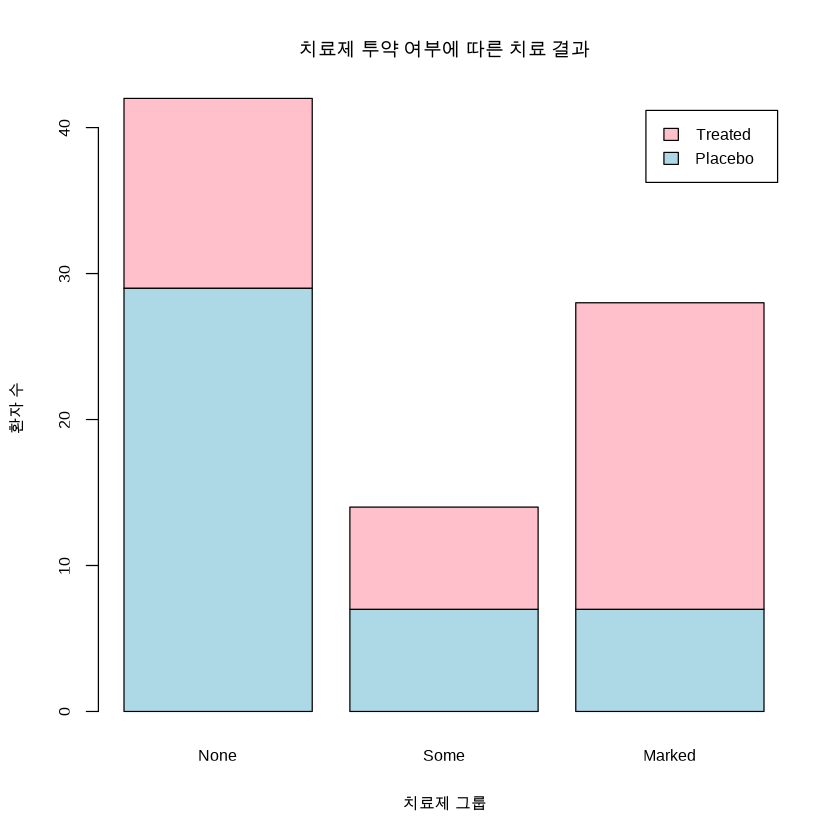

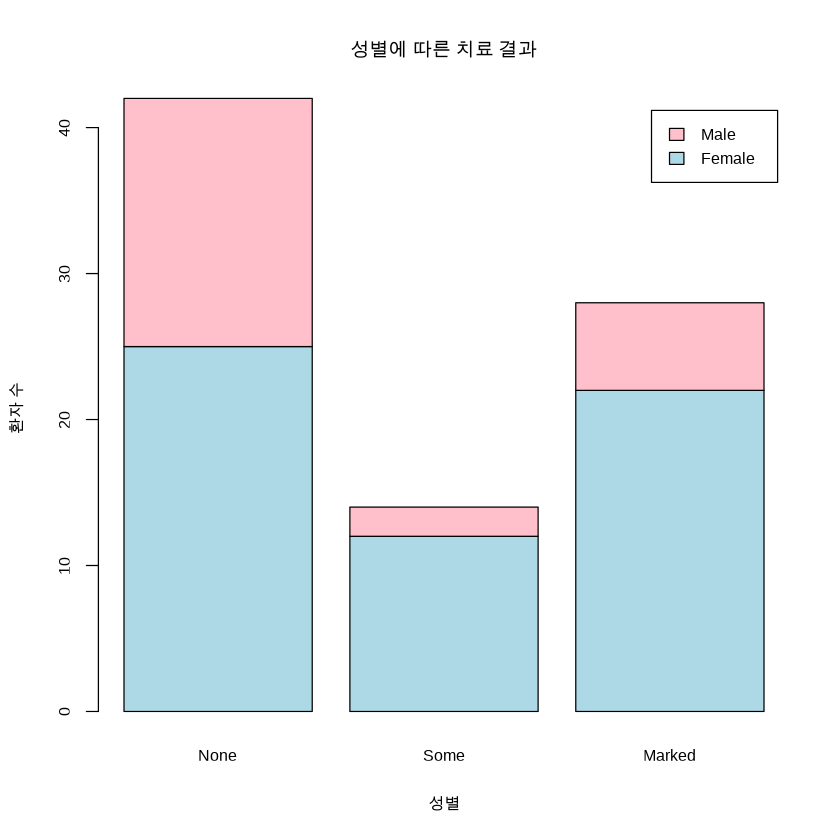

In [40]:
# 필요한 패키지 설치 및 로드
install.packages("vcd")
library(vcd)

# Arthritis 데이터셋 불러오기
data(Arthritis)

# 1. 치료제 투약 여부(Treatment)와 치료 결과(Improved) 간의 연관성 시각화
# 빈도표 생성
treatment_improved <- table(Arthritis$Treatment, Arthritis$Improved)

# 누적 막대 그래프 생성
barplot(treatment_improved,
        beside = FALSE,
        col = c("lightblue", "pink", "lightgreen"),
        legend.text = TRUE,
        main = "치료제 투약 여부에 따른 치료 결과",
        xlab = "치료제 그룹",
        ylab = "환자 수")

# 2. 성별(Sex)과 치료 결과(Improved) 간의 연관성 시각화
# 빈도표 생성
sex_improved <- table(Arthritis$Sex, Arthritis$Improved)

# 누적 막대 그래프 생성
barplot(sex_improved,
        beside = FALSE,
        col = c("lightblue", "pink", "lightgreen"),
        legend.text = TRUE,
        main = "성별에 따른 치료 결과",
        xlab = "성별",
        ylab = "환자 수")

,Ozone,Solar.R,Wind,Temp,Month,Day
,<int>,<int>,<dbl>,<int>,<int>,<int>
1,41,190,7.4,67,5,1
2,36,118,8.0,72,5,2
3,12,149,12.6,74,5,3
4,18,313,11.5,62,5,4
5,NA,NA,14.3,56,5,5
6,28,NA,14.9,66,5,6


,Ozone,Solar.R,Wind,Temp
Ozone,1.0000000,0.3483417,-0.6124966,0.6985414
Solar.R,0.3483417,1.0000000,-0.1271835,0.2940876
Wind,-0.6124966,-0.1271835,1.0000000,-0.4971897
Temp,0.6985414,0.2940876,-0.4971897,1.0000000


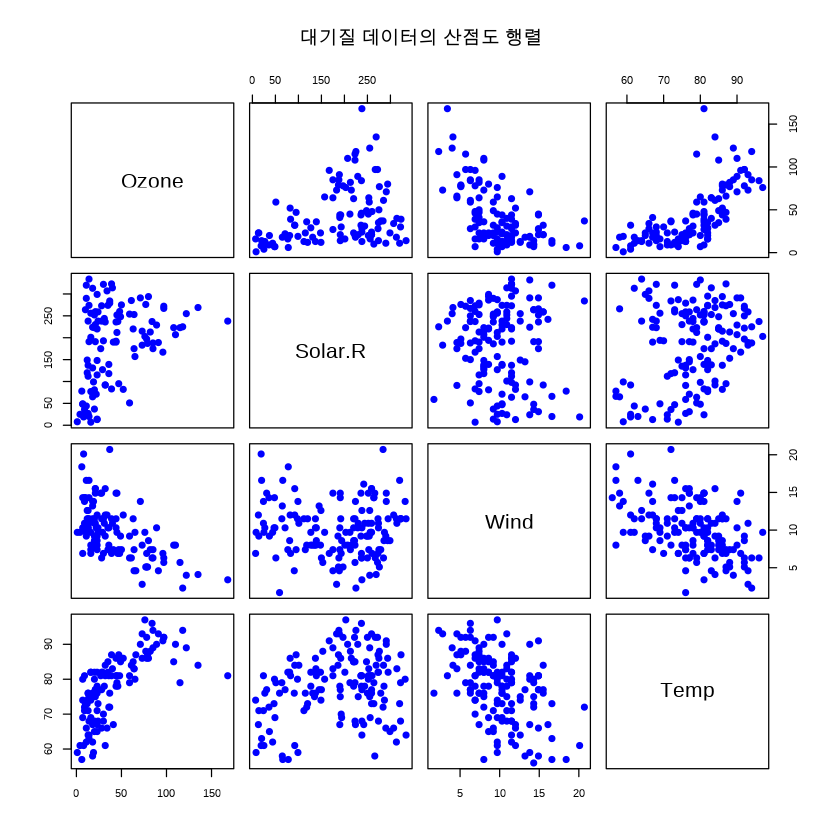

In [41]:
# airquality 데이터셋 확인
head(airquality)

# 산점도 행렬 그리기
pairs(airquality[, c("Ozone", "Solar.R", "Wind", "Temp")],
      main = "대기질 데이터의 산점도 행렬",
      pch = 19,
      col = "blue")

# 상관계수 계산 (NA 제외)
cor(airquality[, c("Ozone", "Solar.R", "Wind", "Temp")], use = "complete.obs")